In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'white', palette = 'deep')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100 #set dpi for viewing figs within the notebook
from tqdm import tqdm

In [2]:
directory = r"C:/Users/njana/Desktop/PygorPro/BehavVids/" # include / at end

infofile = directory+"deets.csv"
infotable = pd.read_csv(infofile)
infotable

,name,type,BlindID,MouseID,Type,Day,Trial,stimdur,Total,startf,endf,trunc end,ethofile
0,esrstimd1t3,standard,NaN,FW4097,Chr2,1,3,30,43309,5255,43309,0,esrstimd1t3
1,dualstimd1t1,standard,D01,FW4674,ChR2,1,1,30,41586,910,41586,0,dualstimd1t1
2,dualstimd1t2,standard,D02,FW4671,Control,1,2,30,41602,1144,41602,0,dualstimd1t2


In [10]:
n = 1
fname = directory+infotable['name'][n]+".mpg"
fname

'C:/Users/njana/Desktop/PygorPro/BehavVids/dualstimd1t1.mpg'

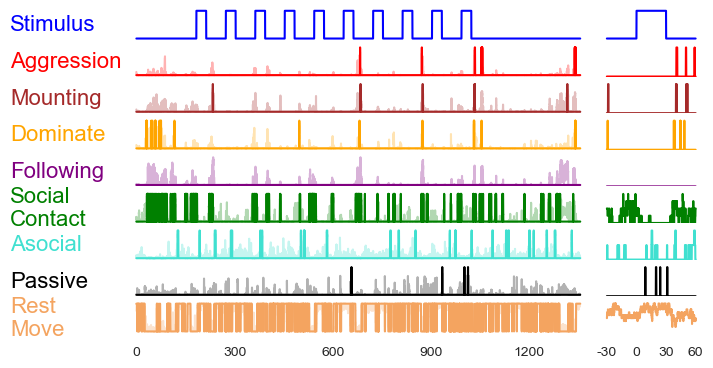

In [11]:
i = n

simbarawdata = pd.read_csv(directory+infotable.name[i]+".csv", header = 0)

behavdata = simbarawdata[["Probability_Aggression","Aggression",	
                            "Probability_Mounting",	"Mounting", 
                            "Probability_Following",	"Following",	
                            "Probability_Dominate",	"Dominate",	
                            "Probability_Social_Contact",	"Social_Contact",	
                            "Probability_Asocial",	"Asocial",	
                            "Probability_Passive",	"Passive",	
                            "Probability_Rest_Move",	"Rest_Move"]]
    
ethoexportpath = directory+infotable.ethofile[i]+".txt"
ethoexport = pd.read_csv(ethoexportpath, sep = ';', header = 37)#, encoding='UTF-16le') # so stupid that this works but it does #if issue with UTF-8, use 16le

input1 = ethoexport.loc[ethoexport["Name"] == "Is input 1 High"]
input1high = input1.loc[input1["Value"] == 1]
input1 = input1.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])
input1high = input1high.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])
input2 = ethoexport.loc[ethoexport["Name"] == "Is input 2 High"]
input2high = input2.loc[input2["Value"] == 1]
input2 = input2.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])
input2high = input2high.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])
    
stimtimes = input2high["Recording time"].to_numpy()
stimtimes = np.asarray(stimtimes, dtype=float)

truncated = infotable.startf[i]
fps = 30
timetrunc = truncated/fps
stimtimes = stimtimes - timetrunc
    
stimstartidx = np.around(stimtimes*fps).astype("int")

stimdur = infotable.stimdur[i] #in seconds
stimidxdur = stimdur*fps
stimendidx = stimstartidx + stimidxdur

stim = np.zeros(behavdata[behavdata.columns[0]].shape[0])

for j in range(stimstartidx.shape[0]):
        stim[stimstartidx[j]:stimendidx[j]] = 1
    
BlindID = str(infotable.BlindID[i])
MouseID = str(infotable.MouseID[i])
Type = str(infotable.Type[i])        
day = str(infotable.Day[i])
trial = str(infotable.Trial[i])
time = np.arange(0,behavdata[behavdata.columns[0]].shape[0])/fps
avgtime = np.arange(0,stimdur*3*fps)/fps

    
colors = ["red","brown","orange","purple","green","turquoise","black","sandybrown"]
sns.set_style("white")

#plt.subplots(9,2,gridspec_kw={'width_ratios': [time.shape[0],stimdur*fps*3]})
plt.subplots(9,2,gridspec_kw={'width_ratios': [5,1]}) #15,1
#plt.subplots_adjust(hspace=0)
plt.subplots_adjust(wspace=0)


plt.subplot(9,2,1)
plt.plot(time,stim, color = 'blue')
plt.ylabel("Stimulus", color = 'blue', rotation = 'horizontal', ha = 'left', va = "center", fontsize = 16, labelpad = 75, fontname = 'Arial')
plt.gca().set_xticks([]) 
plt.gca().set_yticks([])
    
plt.subplot(9,2,2)
plt.plot(avgtime,stim[stimstartidx[0]-(stimdur*fps):stimstartidx[0]+(stimdur*fps*2)], color = 'blue')
plt.gca().set_xticks([]) 
plt.gca().set_yticks([])
    
counter = 0
plotnum = 3

behav_names = ["Aggression", "Mounting","Dominate", 'Following', "Social\nContact", "Asocial", "Passive","Rest\nMove"]

for k in range(8):
        
        plt.subplot(9,2,plotnum)
        plt.plot(time,behavdata[behavdata.columns[counter]],  color = colors[k], alpha = 0.3)
        counter += 1
        
        plt.plot(time,behavdata[behavdata.columns[counter]], color = colors[k], alpha = 1)
        
        plt.ylabel(behav_names[k], color = colors[k], rotation = 'horizontal', ha = 'left', va = "center", fontsize = 16, labelpad = 75, fontname = 'Arial')
        
        if plotnum < 17:
            plt.gca().set_xticks([])
        else:
            plt.gca().set_xticks(np.arange(min(time), max(time)+1, 300), labels = np.arange(min(time), max(time)+1, 300).astype(int), size = 10, fontname = 'Arial')
        plt.gca().set_yticks([])
        sns.despine(bottom = True, left = True)
        
        plotnum += 1
        
        plt.subplot(9,2,plotnum)
        
        # calculate the average data
        behav = behavdata[behavdata.columns[counter]].to_numpy()
        window_behav = []
        for ele in stimstartidx:
            window_behav += [behav[ele-(stimdur*fps):ele+(stimdur*fps*2)]]
    
        window_behav = np.array(window_behav)
        avg_behav = np.average(window_behav, axis = 0)
    
        # plot the average data
        plt.plot(avgtime,avg_behav, color = colors[k], alpha = 1)
        plt.ylim(bottom = 0)
        if plotnum < 17:
            plt.gca().set_xticks([])
        else:
            plt.gca().set_xticks([0,30,60,90], labels = [-30,0,30,60], size = 10, fontname = 'Arial')
        plt.gca().set_yticks([])
        sns.despine(bottom = True, left = True)        
            
        counter += 1   
        plotnum += 1
    
#plt.gcf().set_size_inches(16,8)
plt.gcf().set_size_inches(7.56,4.2)

# check

In [ ]:
# to check
# everything all at once

cap = cv2.VideoCapture(fname)
framewidth = int(cap.get(3))
frameheight = int(cap.get(4))
framefps = int(cap.get(5))
framenos = int(cap.get(7))

dur = 30*framefps
start = stimstartidx[2]-dur
end = stimstartidx[2]+(2*dur)
print("start : "+str(start+infotable['startf'][n])+"\nEnd   : "+str(end+infotable['startf'][n]))

window = 1*framefps #seconds (window is twice as long)
behav_names = ["Aggression", "Mounting","Dominate", 'Following', "Social\nContact", "Asocial", "Passive","Rest\nMove"]
colors = ["red","r","orange","mediumorchid","green","turquoise","darkgray","sandybrown"]

#output = cv2.VideoWriter(directory+infotable['name'][n]+"_output.avi", cv2.VideoWriter_fourcc(*'MJPG'), framefps, (1200,1000))


#while(cap.isOpened()): 
for f in tqdm(range(framenos)):
    ret, frame = cap.read()
    if f > infotable['startf'][n]:
        i = f-infotable['startf'][n]
        if i >= start and i <= end:
        
            # top view
            topview = frame[112:,:int(framewidth/2)]
            topview = cv2.flip(topview, 0)
            #topview = cv2.convertScaleAbs(topview, alpha = 3, beta = 0) # brightness adjustment
            topview = cv2.copyMakeBorder(topview, 44, 0, 10, 10, cv2.BORDER_CONSTANT, None, value = 0)
            #cv2.imshow('topview',topview)
        
            # side view
            sideview = frame[:,int(framewidth/2):]
            sideview = cv2.flip(sideview, 1)
            #sideview = cv2.convertScaleAbs(sideview, alpha = 1.5, beta = 0)
            sideview = cv2.copyMakeBorder(sideview, 34, 10, 10, 10, cv2.BORDER_CONSTANT, None, value = 0)
            #cv2.imshow('sideview',sideview)
        
            combined = np.vstack((topview, sideview))
            cv2.putText(combined, "Top View", (10, 34), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 1)
            cv2.putText(combined, "Front View", (10, topview.shape[0]+26), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 1)
        
            # plot classifier data

            plt.subplots(9,1, facecolor = 'black')

            # plot stim
            plt.subplot(9,1,1)
            plt.plot(stim[i-window:i+window], color= 'dodgerblue')
            plt.gca().set_facecolor("black")
            plt.vlines(window,0,1, color = 'white', linewidth = 2)
            #plt.gca().fill_between(np.arange(0,window*2,1), np.zeros(window*2), stim[i:2*window+i],  where=stim[i:2*window+i] > 0, facecolor='b', alpha=1)
            plt.gca().fill_between(np.arange(0,window*2,1), np.zeros(window*2), stim[i-window:i+window],  where=stim[i-window:i+window] > 0, facecolor='dodgerblue', alpha=1, edgecolor = 'dodgerblue')
            plt.text(2*window,0,"Stimulus", color = 'dodgerblue', size = 20, ha = 'left', va = 'bottom')
            plt.xlim(0,window*2)
            plt.ylim(0,1)
            sns.despine(bottom = True, left = True)
            plt.xticks([])
            plt.yticks([])

            counter = 0
            # plot behavior data
            for j in range(8):
                plt.subplot(9,1,j+2)
                plt.gca().set_facecolor("black")
                behav_prob = behavdata[behavdata.columns[counter]].to_numpy()
                counter += 1
                plt.plot(behav_prob[i-window:i+window], linewidth = 2, color = colors[j])
                behav_rast = behavdata[behavdata.columns[counter]].to_numpy()
                plt.gca().fill_between(np.arange(0,window*2,1), np.zeros(window*2), behav_rast[i-window:i+window],  where=behav_rast[i-window:i+window] > 0, facecolor=colors[j], alpha=1, edgecolor = colors[j])
                counter += 1
                plt.vlines(window,0,1, color = 'white', linewidth = 2)
                plt.text(2*window,0,behav_names[j], color = colors[j], size = 20, ha = 'left', va = 'bottom')
                plt.xlim(0,window*2)
                plt.ylim(0,1)
                sns.despine(bottom = True, left = True)
                plt.xticks([])
                plt.yticks([])

            plt.gcf().set_size_inches(5.4,9.46)
            plt.gcf().tight_layout()
            canvas = plt.gca().figure.canvas
            canvas.draw()
            data = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8)
            plots = data.reshape(canvas.get_width_height()[::-1] + (3,))
            plots = cv2.cvtColor(plots, cv2.COLOR_BGR2RGB)
            plots = cv2.copyMakeBorder(plots, 44, 10, 0, 0, cv2.BORDER_CONSTANT, None, value = 0)
            plt.close('all')

            combined = np.hstack((combined,plots))
            #output.write(combined)

            cv2.imshow('combined', combined)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                  break
 
        
cv2.destroyAllWindows() 
cap.release()
#output.release()

print("done!")

# create video

In [ ]:
# everything all at once

cap = cv2.VideoCapture(fname)
framewidth = int(cap.get(3))
frameheight = int(cap.get(4))
framefps = int(cap.get(5))
framenos = int(cap.get(7))

dur = 30*framefps
start = stimstartidx[0]-dur
end = stimstartidx[0]+(2*dur)
print("start : "+str(start+infotable['startf'][n])+"\nEnd   : "+str(end+infotable['startf'][n]))

window = 1*framefps #seconds (window is twice as long)
behav_names = ["Aggression", "Mounting","Dominate", 'Following', "Social\nContact", "Asocial", "Passive","Rest\nMove"]
colors = ["red","r","orange","mediumorchid","green","turquoise","darkgray","sandybrown"]

output = cv2.VideoWriter(directory+infotable['name'][n]+"_output.avi", cv2.VideoWriter_fourcc(*'MJPG'), framefps, (1200,1000))


#while(cap.isOpened()): 
for f in tqdm(range(framenos)):
    ret, frame = cap.read()
    if f > infotable['startf'][n]:
        i = f-infotable['startf'][n]
        if i >= start and i <= end:
        
            # top view
            topview = frame[112:,:int(framewidth/2)]
            topview = cv2.flip(topview, 0)
            #topview = cv2.convertScaleAbs(topview, alpha = 3, beta = 0) # brightness adjustment
            topview = cv2.copyMakeBorder(topview, 44, 0, 10, 10, cv2.BORDER_CONSTANT, None, value = 0)
            #cv2.imshow('topview',topview)
        
            # side view
            sideview = frame[:,int(framewidth/2):]
            sideview = cv2.flip(sideview, 1)
            #sideview = cv2.convertScaleAbs(sideview, alpha = 1.5, beta = 0)
            sideview = cv2.copyMakeBorder(sideview, 34, 10, 10, 10, cv2.BORDER_CONSTANT, None, value = 0)
            
            #cv2.imshow('sideview',sideview)
        
            combined = np.vstack((topview, sideview))
            cv2.putText(combined, "Top View", (10, 34), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 1)
            cv2.putText(combined, "Front View", (10, topview.shape[0]+26), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 1)
        
            # plot classifier data

            plt.subplots(9,1, facecolor = 'black')

            # plot stim
            plt.subplot(9,1,1)
            plt.plot(stim[i-window:i+window], color= 'dodgerblue')
            plt.gca().set_facecolor("black")
            plt.vlines(window,0,1, color = 'white', linewidth = 2)
            plt.gca().fill_between(np.arange(0,window*2,1), np.zeros(window*2), stim[i-window:i+window],  where=stim[i-window:i+window] > 0, facecolor='dodgerblue', alpha=1, edgecolor = 'dodgerblue')
            plt.text(2*window,0,"Stimulus", color = 'dodgerblue', size = 20, ha = 'left', va = 'bottom')
            plt.xlim(0,window*2)
            plt.ylim(0,1)
            sns.despine(bottom = True, left = True)
            plt.xticks([])
            plt.yticks([])

            counter = 0
            # plot behavior data
            for j in range(8):
                plt.subplot(9,1,j+2)
                plt.gca().set_facecolor("black")
                behav_prob = behavdata[behavdata.columns[counter]].to_numpy()
                counter += 1
                plt.plot(behav_prob[i-window:i+window], linewidth = 2, color = colors[j])
                behav_rast = behavdata[behavdata.columns[counter]].to_numpy()
                plt.gca().fill_between(np.arange(0,window*2,1), np.zeros(window*2), behav_rast[i-window:i+window],  where=behav_rast[i-window:i+window] > 0, facecolor=colors[j], alpha=1, edgecolor=colors[j])
                counter += 1
                plt.vlines(window,0,1, color = 'white', linewidth = 2)
                plt.text(2*window,0,behav_names[j], color = colors[j], size = 20, ha = 'left', va = 'bottom')
                plt.xlim(0,window*2)
                plt.ylim(0,1)
                sns.despine(bottom = True, left = True)
                plt.xticks([])
                plt.yticks([])

            plt.gcf().set_size_inches(5.4,9.46)
            plt.gcf().tight_layout()
            canvas = plt.gca().figure.canvas
            canvas.draw()
            data = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8)
            plots = data.reshape(canvas.get_width_height()[::-1] + (3,))
            plots = cv2.cvtColor(plots, cv2.COLOR_BGR2RGB)
            plots = cv2.copyMakeBorder(plots, 44, 10, 0, 0, cv2.BORDER_CONSTANT, None, value = 0)
            plt.close('all')

            combined = np.hstack((combined,plots))
            output.write(combined)

            #cv2.imshow('combined', combined)

            #if cv2.waitKey(1) & 0xFF == ord('q'):
                  #break
 
        
cv2.destroyAllWindows() 
cap.release()
output.release()

print("done!")

start : 5505
End   : 8205


 29%|█████████████████████▍                                                    | 12078/41586 [05:52<00:25, 1166.16it/s]

Behavior plots

In [ ]:
# behavior plots

window = 30*1 #seconds (window is twice as long)
behav_names = ["Aggression", "Mounting","Dominate", 'Following', "Social\nContact", "Asocial", "Passive","Rest\nMove"]
colors = ["red","brown","orange","purple","green","turquoise","darkgray","sandybrown"]

for i in range(5400,9000):
        # plot classifier data
        plt.subplots(9,1, facecolor = 'black')
        
        plt.subplot(9,1,1)
        # plot stim
        plt.plot(stim[i:2*window+i], color= 'b')
        plt.gca().set_facecolor("black")
        plt.vlines(window,0,1, color = 'white', linewidth = 2)
        plt.gca().fill_between(np.arange(0,window*2,1), np.zeros(window*2), stim[i:2*window+i],  where=stim[i:2*window+i] > 0, facecolor='b', alpha=1)
        plt.text(2*window,0,"Stimulus", color = 'b', size = 15, ha = 'left', va = 'bottom')
        plt.xlim(0,window*2)
        plt.ylim(0,1)
        sns.despine(bottom = True, left = True)
        plt.xticks([])
        plt.yticks([])
        
        counter = 0
        # plot behavior data
        for j in range(8):
            plt.subplot(9,1,j+2)
            plt.gca().set_facecolor("black")
            behav_prob = behavdata[behavdata.columns[counter]].to_numpy()
            counter += 1
            
            
            plt.plot(behav_prob[i-window:i+window], linewidth = 2, color = colors[j])
            if counter < 7:
                behav_rast = behavdata[behavdata.columns[counter]].to_numpy()
                plt.gca().fill_between(np.arange(0,window*2,1), np.zeros(window*2), behav_rast[i:2*window+i],  where=behav_rast[i:2*window+i] > 0, facecolor=colors[j], alpha=1)
            counter += 1
            plt.vlines(window,0,1, color = 'white', linewidth = 2)
            plt.text(2*window,0,behav_names[j], color = colors[j], size = 15, ha = 'left', va = 'bottom')
            plt.xlim(0,window*2)
            plt.ylim(0,1)
            sns.despine(bottom = True, left = True)
            plt.xticks([])
            plt.yticks([])
            
        plt.gcf().set_size_inches(5,9.46)
        plt.gcf().tight_layout()
        canvas = plt.gca().figure.canvas
        canvas.draw()
        data = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8)
        plots = data.reshape(canvas.get_width_height()[::-1] + (3,))
        plots = cv2.cvtColor(plots, cv2.COLOR_BGR2RGB)
        plots = cv2.copyMakeBorder(plots, 44, 10, 0, 0, cv2.BORDER_CONSTANT, None, value = 0)
        plt.close('all')
        
        cv2.imshow("plots", plots)
        
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
              break
    
cv2.destroyAllWindows() 

Decomposed videos

In [ ]:
# videos decomposed
cap = cv2.VideoCapture(fname)
framewidth = int(cap.get(3))
frameheight = int(cap.get(4))
framefps = int(cap.get(5))
framenos = int(cap.get(7))

f=0
while(cap.isOpened()): 
#for i in range(9000):
    f += 1
    ret, frame = cap.read()
    if frame is not None and f > infotable['startf'][0]:
        #cv2.imshow('frame',frame)
        
        # top view
        topview = frame[112:,:int(framewidth/2)]
        #topview = cv2.convertScaleAbs(topview, alpha = 3, beta = 0)
        topview = cv2.copyMakeBorder(topview, 44, 0, 10, 10, cv2.BORDER_CONSTANT, None, value = 0)
        #topview = cv2.flip(topview, 1)
        #cv2.imshow('topview',topview)
        
        # side view
        sideview = frame[:,int(framewidth/2):]
        #sideview = cv2.convertScaleAbs(sideview, alpha = 1.5, beta = 0)
        sideview = cv2.copyMakeBorder(sideview, 34, 10, 10, 10, cv2.BORDER_CONSTANT, None, value = 0)
        sideview = cv2.flip(sideview, 1)
        #cv2.imshow('sideview',sideview)
        
        combined = np.vstack((topview, sideview))
        
        cv2.putText(combined, "Top View", (10, 34), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 1)
        cv2.putText(combined, "Front View", (10, topview.shape[0]+26), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 1)
        cv2.imshow("videos", combined)
        if cv2.waitKey(25) & 0xFF == ord('q'):
              break
 
        
cv2.destroyAllWindows() 
cap.release()

backup of everything in one frame

In [ ]:
# everything all at once

cap = cv2.VideoCapture(fname)
framewidth = int(cap.get(3))
frameheight = int(cap.get(4))
framefps = int(cap.get(5))
framenos = int(cap.get(7))

window = 30*1 #seconds (window is twice as long)
behav_names = ["Aggression", "Mounting","Dominate", 'Following', "Social\nContact", "Asocial", "Passive","Rest\nMove"]
colors = ["red","brown","orange","purple","green","turquoise","darkgray","sandybrown"]

for i in range(9000):
    ret, frame = cap.read()
    if frame is not None:
        #cv2.imshow('frame',frame)
        
        # top view
        topview = frame[112:,:int(framewidth/2)]
        topview = cv2.convertScaleAbs(topview, alpha = 3, beta = 0)
        topview = cv2.copyMakeBorder(topview, 44, 0, 10, 10, cv2.BORDER_CONSTANT, None, value = 0)
        #cv2.imshow('topview',topview)
        
        # side view
        sideview = frame[:,int(framewidth/2):]
        sideview = cv2.convertScaleAbs(sideview, alpha = 1.5, beta = 0)
        sideview = cv2.copyMakeBorder(sideview, 34, 10, 10, 10, cv2.BORDER_CONSTANT, None, value = 0)
        #cv2.imshow('sideview',sideview)
        
        combined = np.vstack((topview, sideview))
        
        cv2.putText(combined, "Top View", (10, 34), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 1)
        cv2.putText(combined, "Front View", (10, topview.shape[0]+26), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 1)
        
        
        
        # plot classifier data
        plt.subplots(9,1, facecolor = 'black')
        
        plt.subplot(9,1,1)
        # plot stim
        plt.plot(stim[i:2*window+i], color= 'b')
        plt.gca().set_facecolor("black")
        plt.vlines(window,0,1, color = 'white', linewidth = 2)
        plt.gca().fill_between(np.arange(0,window*2,1), np.zeros(window*2), stim[i:2*window+i],  where=stim[i:2*window+i] > 0, facecolor='b', alpha=1)
        plt.text(2*window,0,"Stimulus", color = 'b', size = 20, ha = 'left', va = 'bottom')
        plt.xlim(0,window*2)
        plt.ylim(0,1)
        sns.despine(bottom = True, left = True)
        plt.xticks([])
        plt.yticks([])
        
        counter = 0
        # plot behavior data
        for j in range(8):
            plt.subplot(9,1,j+2)
            plt.gca().set_facecolor("black")
            behav_prob = behavdata[behavdata.columns[counter]].to_numpy()
            counter += 1
            
            
            plt.plot(behav_prob[i-window:i+window], linewidth = 2, color = colors[j])
            if counter < 7:
                behav_rast = behavdata[behavdata.columns[counter]].to_numpy()
                plt.gca().fill_between(np.arange(0,window*2,1), np.zeros(window*2), behav_rast[i:2*window+i],  where=behav_rast[i:2*window+i] > 0, facecolor=colors[j], alpha=1)
            counter += 1
            plt.vlines(window,0,1, color = 'white', linewidth = 2)
            plt.text(2*window,0,behav_names[j], color = colors[j], size = 20, ha = 'left', va = 'bottom')
            plt.xlim(0,window*2)
            plt.ylim(0,1)
            sns.despine(bottom = True, left = True)
            plt.xticks([])
            plt.yticks([])
            
        plt.gcf().set_size_inches(5,9.46)
        plt.gcf().tight_layout()
        canvas = plt.gca().figure.canvas
        canvas.draw()
        data = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8)
        plots = data.reshape(canvas.get_width_height()[::-1] + (3,))
        plots = cv2.cvtColor(plots, cv2.COLOR_BGR2RGB)
        plots = cv2.copyMakeBorder(plots, 44, 10, 0, 0, cv2.BORDER_CONSTANT, None, value = 0)
        plt.close('all')
        
        combined = np.hstack((combined,plots))
        cv2.imshow('combined', combined)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
              break
 
        
cv2.destroyAllWindows() 
cap.release()